In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.duplicated().any()

False

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='BloodPressure'>

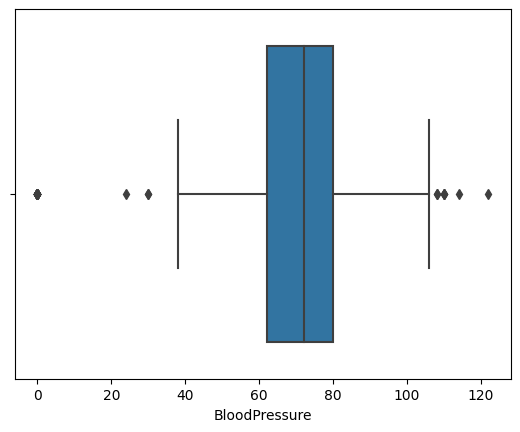

In [11]:
sns.boxplot(df.BloodPressure)

In [15]:
df[["Glucose","BloodPressure","Insulin","SkinThickness","BMI"]]=df[["Glucose","BloodPressure","Insulin","SkinThickness","BMI"]].replace(0,np.nan)

In [17]:
df.isnull().sum()/len(df)*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

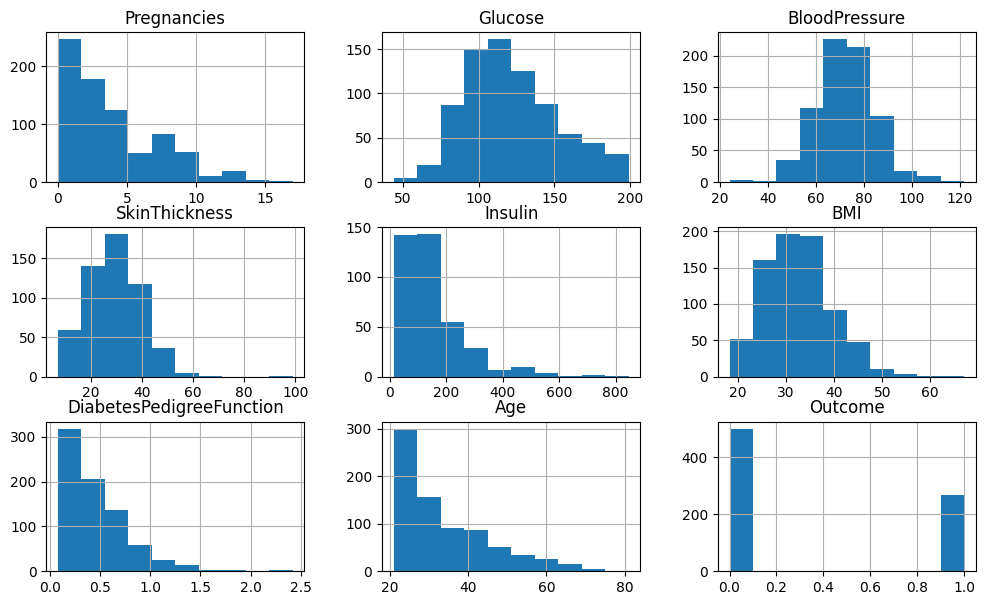

In [20]:
p=df.hist(figsize=(12,7))

In [21]:
df["Glucose"]=df["Glucose"].fillna(df["Glucose"].mean())

In [22]:
df["BloodPressure"]=df["BloodPressure"].fillna(df["BloodPressure"].mean())

In [23]:
df["SkinThickness"]=df["SkinThickness"].fillna(df["SkinThickness"].median())

In [24]:
df["Insulin"]=df["Insulin"].fillna(df["Insulin"].median())

In [25]:
df["BMI"]=df["BMI"].fillna(df["BMI"].median())

In [26]:
df.isnull().sum()/len(df)*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

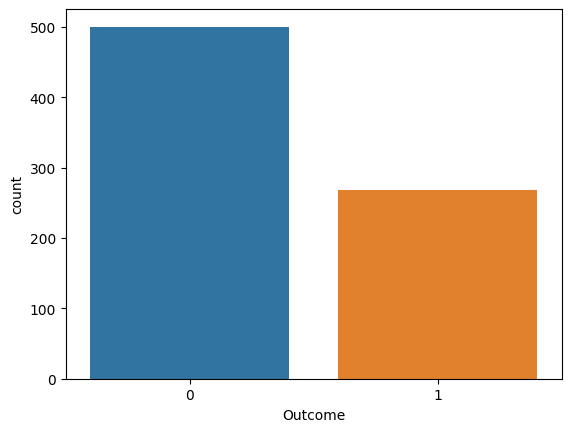

In [27]:
sns.countplot(df.Outcome)

In [3]:
sns.pairplot(df,hue="Outcome")

NameError: name 'sns' is not defined

In [28]:
corr=df.corr

<AxesSubplot:>

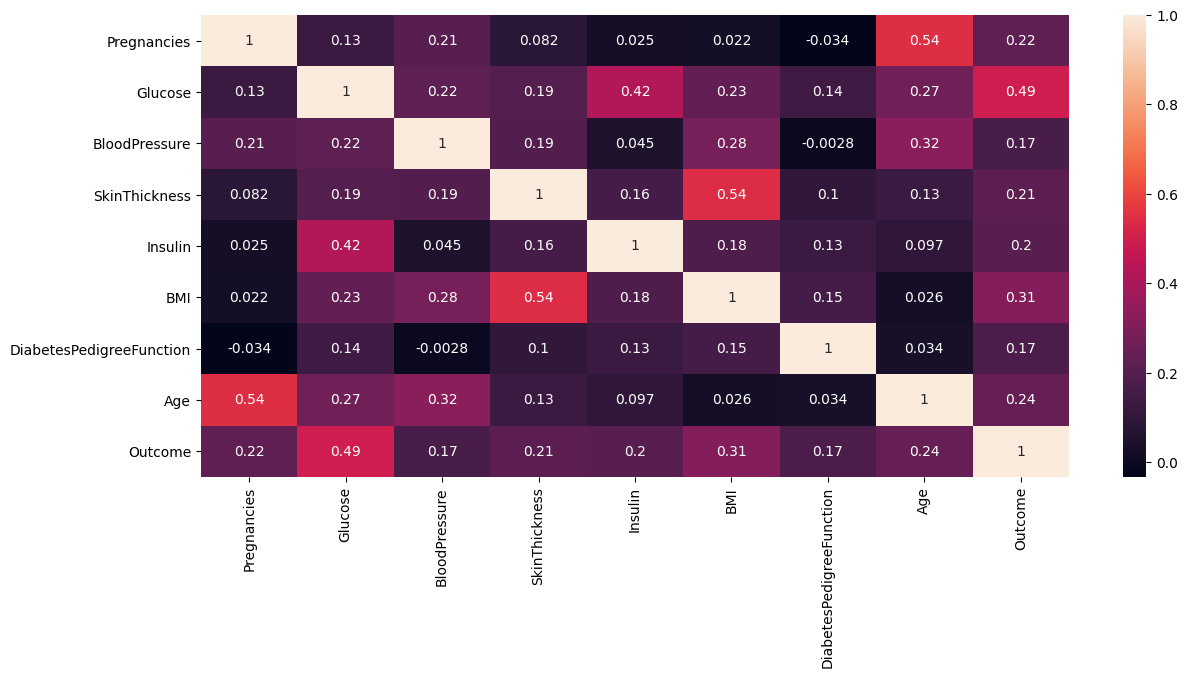

In [29]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(),annot=True)

In [36]:
x=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [38]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47


In [39]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=123)

In [41]:
x_train.shape

(614, 8)

In [42]:
x_test.shape

(154, 8)

In [43]:
y_train.shape

(614,)

In [44]:
y_test.shape

(154,)

In [32]:
# Feature scaling 

In [34]:
from sklearn.preprocessing import StandardScaler

In [45]:
sc=StandardScaler()
X_train=sc.fit_transform(x_train)
X_test=sc.fit_transform(x_test)

In [46]:
# model building

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [52]:
clasifier=KNeighborsClassifier(n_neighbors=5)
clasifier.fit(X_train,y_train)
y_pred_train=clasifier.predict(X_train)
y_pred_test=clasifier.predict(X_test)
print("Train Data")
print("Accuracy_score:{}".format(accuracy_score(y_train,y_pred_train)))
print("Test Data")
print("Accuracy_score:{}".format(accuracy_score(y_test,y_pred_test)))

Train Data
Accuracy_score:0.8224755700325733
Test Data
Accuracy_score:0.7792207792207793


In [60]:
for i in range(1,20):
    clasifier=KNeighborsClassifier(n_neighbors=i)
    clasifier.fit(X_train,y_train)
    y_pred_train=clasifier.predict(X_train)
    y_pred_test=clasifier.predict(X_test)
    print("for k:",i)
    print("Train Data")
    print("Accuracy_score:{}".format(accuracy_score(y_train,y_pred_train)))
    print("Test Data")
    print("Accuracy_score:{}".format(accuracy_score(y_test,y_pred_test)))
    

for k: 1
Train Data
Accuracy_score:1.0
Test Data
Accuracy_score:0.7012987012987013
for k: 2
Train Data
Accuracy_score:0.8436482084690554
Test Data
Accuracy_score:0.7337662337662337
for k: 3
Train Data
Accuracy_score:0.8452768729641694
Test Data
Accuracy_score:0.7467532467532467
for k: 4
Train Data
Accuracy_score:0.8289902280130294
Test Data
Accuracy_score:0.7467532467532467
for k: 5
Train Data
Accuracy_score:0.8224755700325733
Test Data
Accuracy_score:0.7792207792207793
for k: 6
Train Data
Accuracy_score:0.7899022801302932
Test Data
Accuracy_score:0.7662337662337663
for k: 7
Train Data
Accuracy_score:0.8029315960912052
Test Data
Accuracy_score:0.7792207792207793
for k: 8
Train Data
Accuracy_score:0.7996742671009772
Test Data
Accuracy_score:0.7792207792207793
for k: 9
Train Data
Accuracy_score:0.7964169381107492
Test Data
Accuracy_score:0.7987012987012987
for k: 10
Train Data
Accuracy_score:0.7817589576547231
Test Data
Accuracy_score:0.8116883116883117
for k: 11
Train Data
Accuracy_scor

In [65]:
clf=KNeighborsClassifier(n_neighbors=11)
clf.fit(X_train,y_train)
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)
print("Train Data")
print("Accuracy_score:{}".format(accuracy_score(y_train,y_pred_train)))
print("Test Data")
print("Accuracy_score:{}".format(accuracy_score(y_test,y_pred_test)))

Train Data
Accuracy_score:0.8013029315960912
Test Data
Accuracy_score:0.7987012987012987


In [63]:
#Hyperparameter Tunning

In [64]:
from sklearn.model_selection import GridSearchCV

In [67]:
param_grid={
    "n_neighbors":np.arange(1,15),
    "weights":["uniform","distance"],
    "metric":["minkowski","manhatten","euclidean"]
    }

In [70]:
grid_clf=GridSearchCV(clf,param_grid=param_grid,cv=5,scoring="accuracy",n_jobs=-1)
grid_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=11), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'manhatten', 'euclidean'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [71]:
grid_clf.best_params_

{'metric': 'minkowski', 'n_neighbors': 14, 'weights': 'distance'}

In [72]:
grid_clf.best_score_

0.7622284419565506

In [73]:
grid_pred_train=grid_clf.predict(X_train)
grid_pred_test=grid_clf.predict(X_test)

In [74]:
print("Train Data")
print("Accuracy_score:{}".format(accuracy_score(y_train,grid_pred_train)))
print("Test Data")
print("Accuracy_score:{}".format(accuracy_score(y_test,grid_pred_test)))

Train Data
Accuracy_score:1.0
Test Data
Accuracy_score:0.8246753246753247
